# Segment CD13

The goal of this notebook is to explain how CD13 segmentation was developed and how it should be working.

In [4]:
import napari
from pathlib import Path

from morphocilia.io import load_rescaled_channel

In [2]:
DATA_DIR = Path("../data/20231025_p1_cd13_opn_arl13b.lif")

In [17]:
cd13_channel = load_rescaled_channel(DATA_DIR, "pos2_zstack", 3)

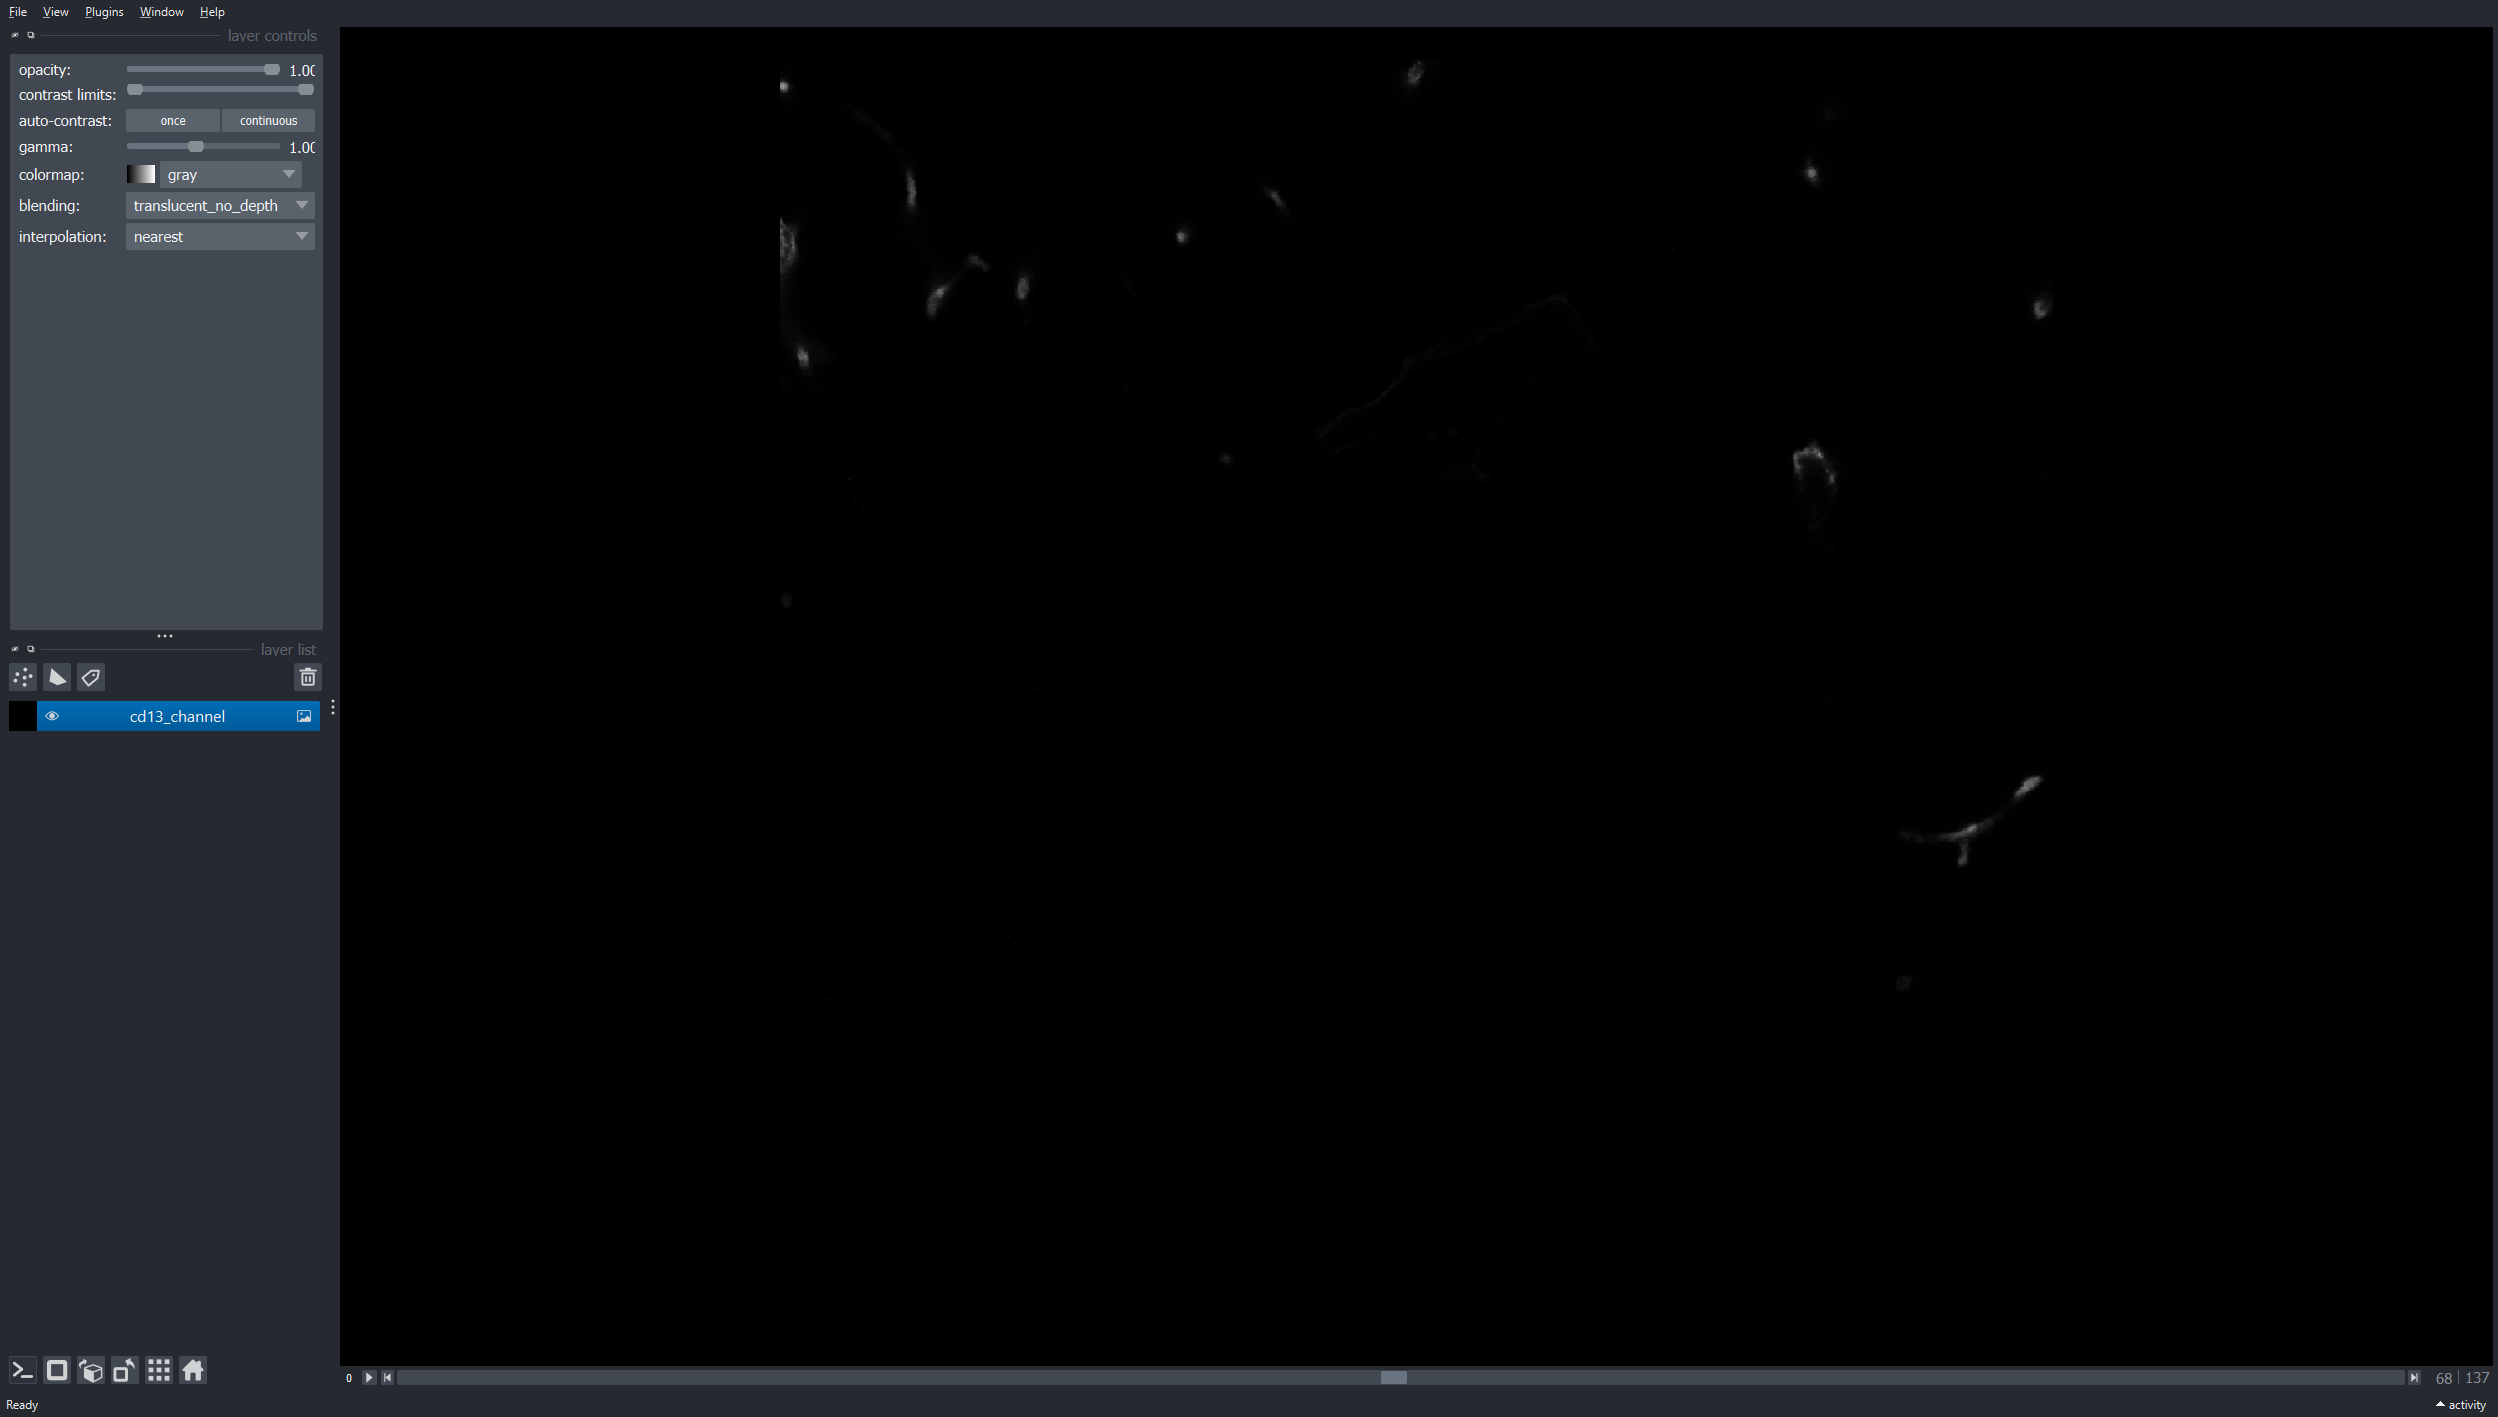

In [21]:
viewer = napari.view_image(cd13_channel)

napari.utils.nbscreenshot(viewer)

It looks like a good way of dealing with these images might be to segment them according to intensity. 
Let's try with several thresholding algorithms and see which one works better.

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

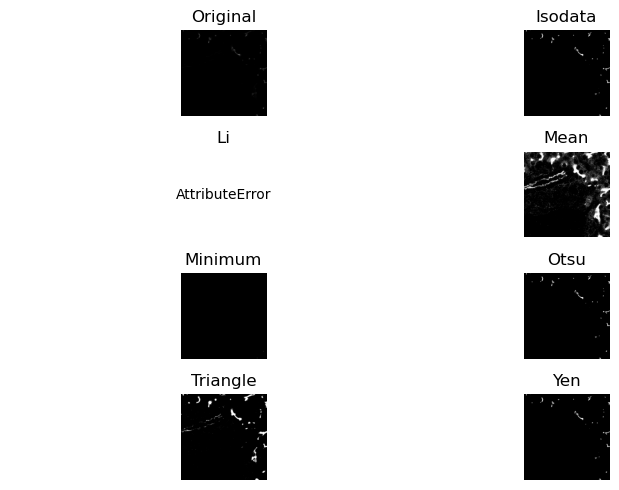

In [20]:
from skimage.filters import try_all_threshold

try_all_threshold(cd13_channel[30])

We have to be careful on how we interpret these results as these algorithms rely on the intensity histogram of the image and as we have used a single plane, the histogram is probably different than what would happen if we use the whole stack.
Already by seeing these images, we can have some estimate of which algorithms are the first we should try out and we can quickly assess them using Napari for visualization.

In [30]:
from skimage.filters import threshold_otsu

In [31]:
cd13_threshold = threshold_otsu(cd13_channel)
cd13_mask = cd13_channel > cd13_threshold

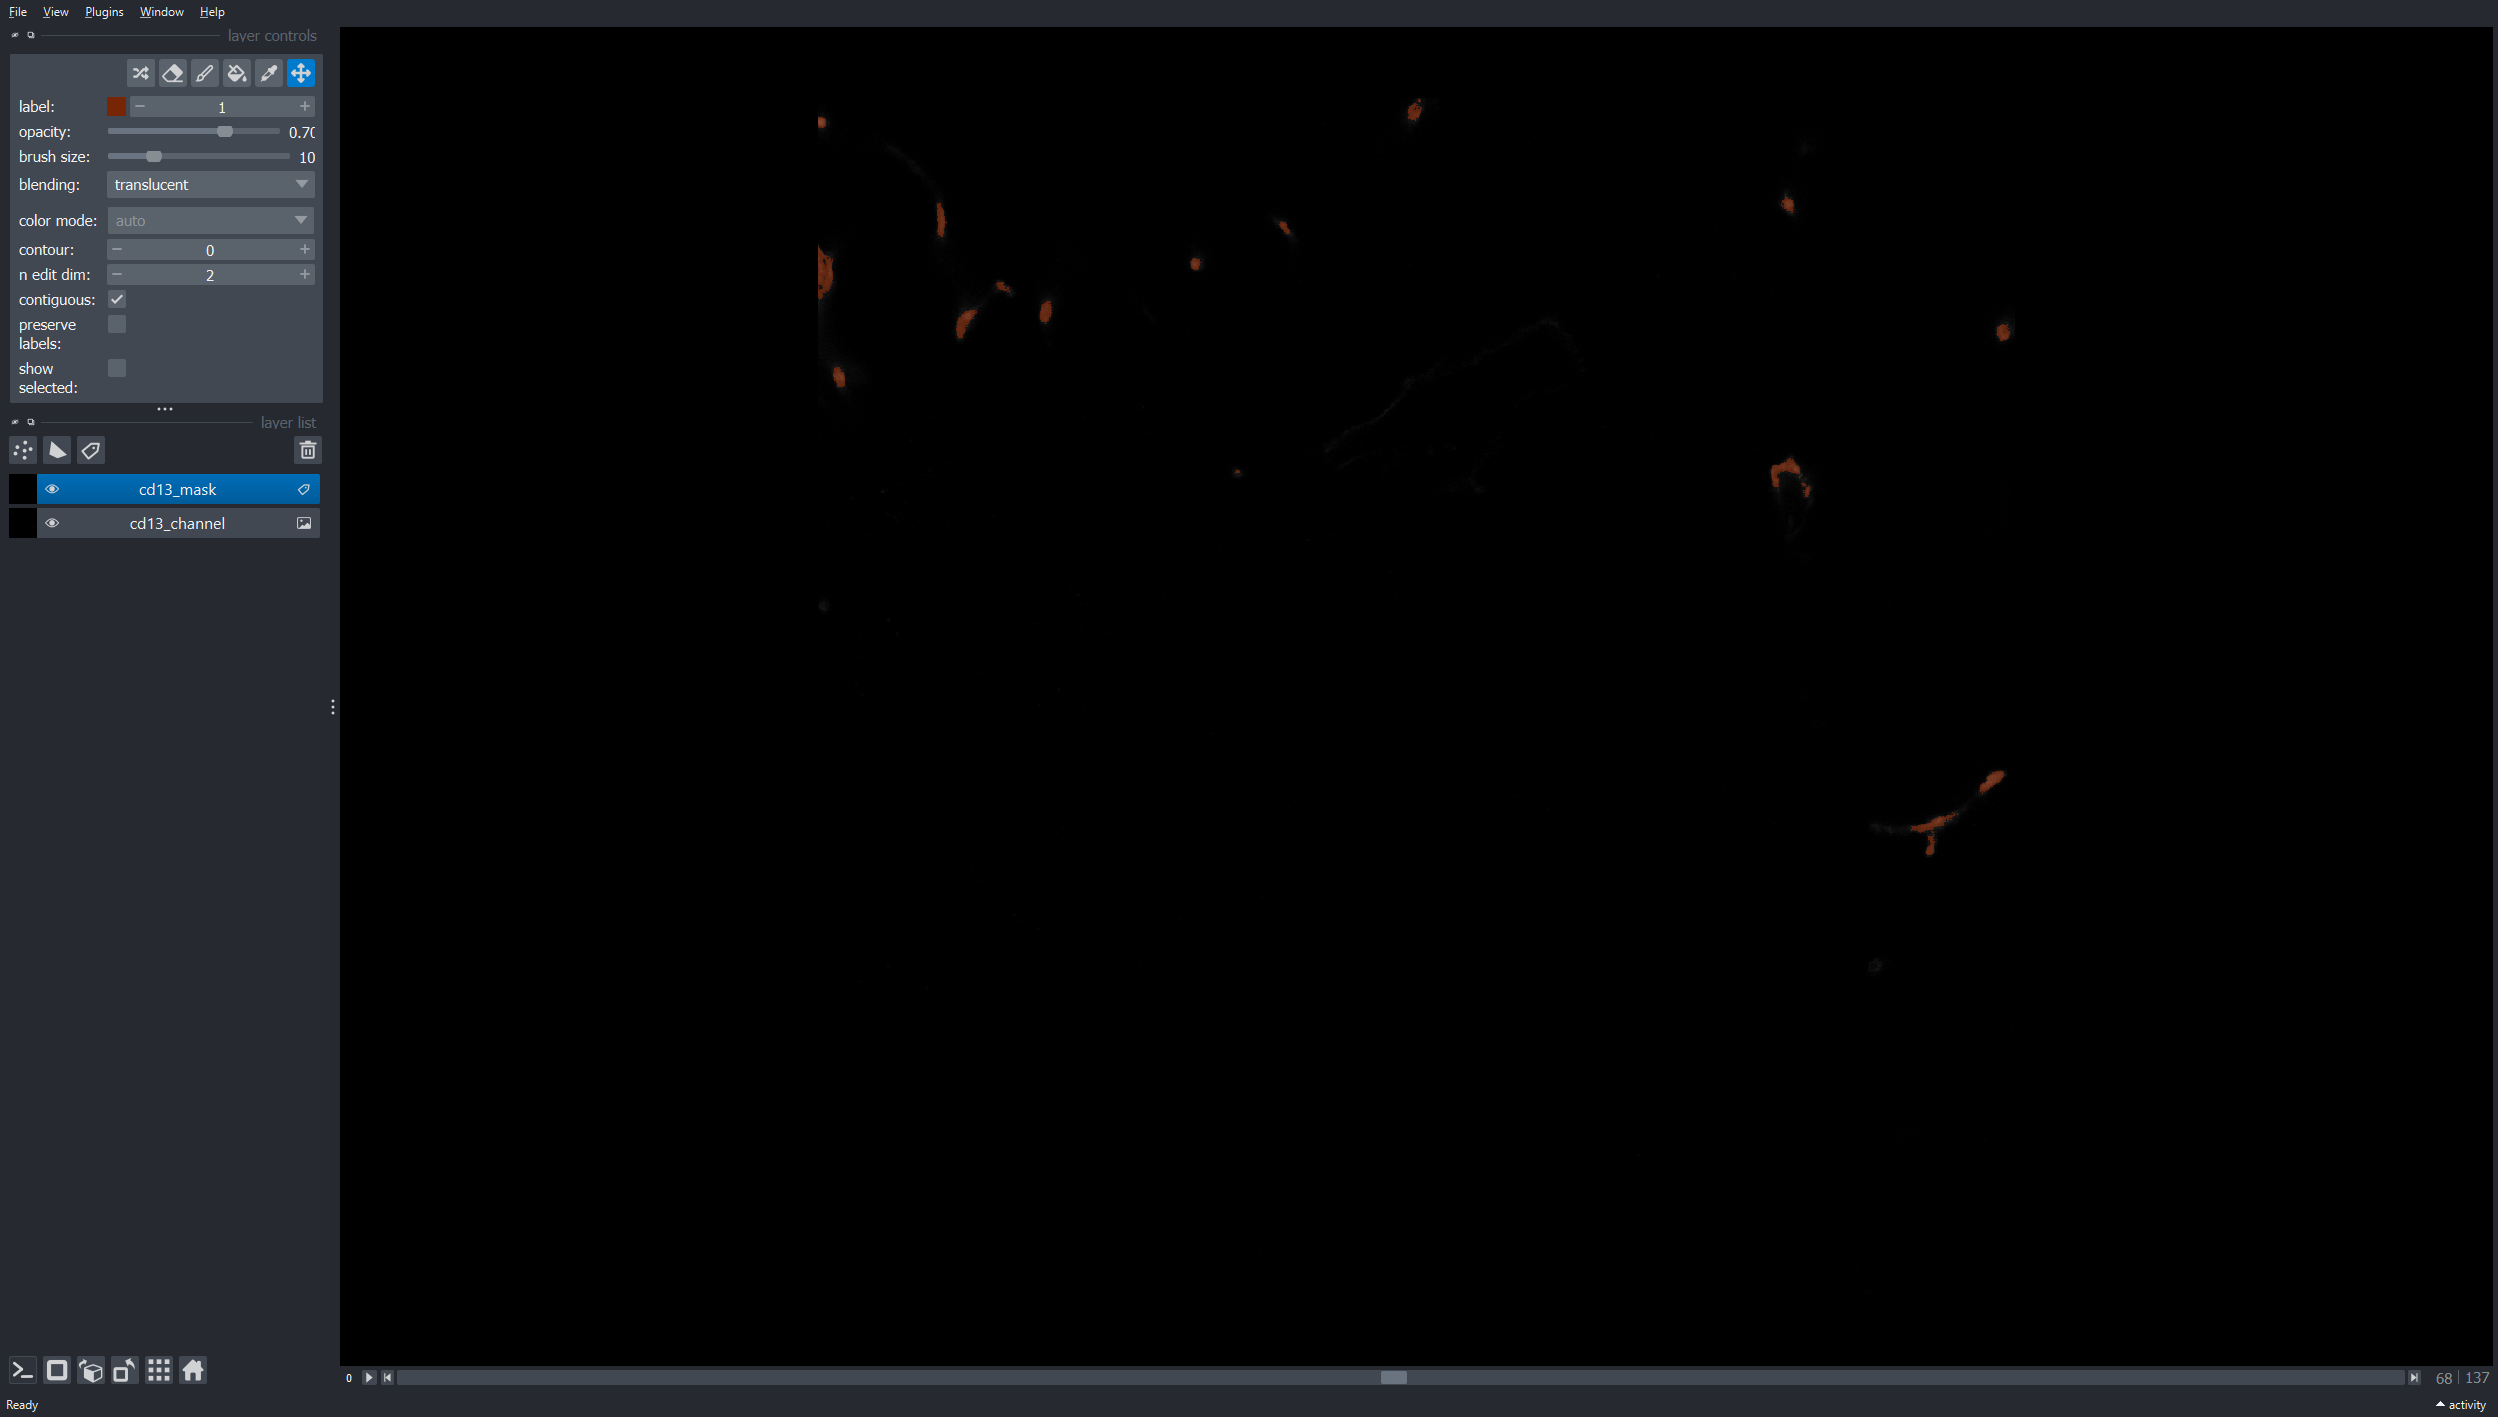

In [32]:
viewer = napari.view_image(cd13_channel)
viewer.add_labels(cd13_mask)

napari.utils.nbscreenshot(viewer)

I first tried triangle, but it was segmenting even very dim pixels and glow surrounding objects.
Otsu thresholding worked the best.
It actually looks so good that there's probably no need to apply morphological operations afterwards to improve this.